# 1. Overview

This competition, "Pump it Up: Data Mining the Water Table," hosted on DrivenData, challenges participants to predict the functional status of water pumps across Tanzania using a provided dataset. The contest spans from 2024 and aims to enhance access to clean, potable water by identifying malfunctioning water pumps. Participants are supplied with extensive data on various characteristics of the water points, from construction year to water quality. The primary goal is to classify each water point into one of three categories: functional, functional needs repair, and non-functional. This analysis could guide strategic decisions for improving water access and infrastructure investments in developing regions.

# 2. Business Understanding

The core objective of the "Pump it Up: Data Mining the Water Table" competition is to enable the identification of water pumps in Tanzania that are functional, require repairs, or are non-functional. The insights derived from this analysis will directly influence decisions regarding maintenance, investments, and resource allocation in the water infrastructure sector. Stakeholders, including government agencies and NGOs, will use these findings to prioritize and streamline efforts towards ensuring reliable water access. By effectively categorizing water points, the project aims to enhance operational efficiencies and reduce downtime due to pump failures. The ultimate goal is to support sustainable water management practices that can significantly impact public health and economic development in Tanzania.

Primary stakeholders for this project are the Tanzanian government and international development organizations focused on improving water access in the region.

# 3. Data Understanding

## 3.1 Data Description

Drawing from a comprehensive dataset provided by the "Pump it Up: Data Mining the Water Table" competition on DrivenData, our analysis is centered around extensive information regarding water points across Tanzania. This dataset includes:

- Geographic data such as location coordinates, altitude, and administrative divisions (region, district, and ward).
- Water point specifics such as the type, construction year, funding organization, and managing entity.
- Operational data including the water source, extraction type, water quality, and current functional status of each water pump.

Our investigation targets three key objectives: identifying patterns of pump functionality, understanding factors leading to pump failures or repairs, and assessing the impacts of management practices on pump operability. By analyzing these elements, we aim to derive actionable insights that can guide infrastructural improvements and strategic investments in water resource management. The outcome of this analysis will inform decision-making processes for stakeholders involved in Tanzanian water supply, optimizing interventions for enhanced water accessibility and reliability. This focused approach empowers our stakeholders to efficiently address the most critical needs, leveraging data-driven strategies to improve public health and community resilience.

## 3.2 Code

The intention of this notebook is to show the general procedure of the whole project. 
In each one of the sections, before showing the results, we will provide a link to the notebooks that include a step by step description of the procedure.

### 3.2.1 Descriptive and Exploratory Analysis

To have the detailed step by step results of the exploratory analysis, please see the data understanding notebook through this link [Go to Notebook 00_data_understanding.ipynb](00_data_understanding.ipynb)

In [ ]:
# # Reading the dataset
# df_train = pd.read_csv(INPUT_PATH_Training_set_values)
# df_train.head()

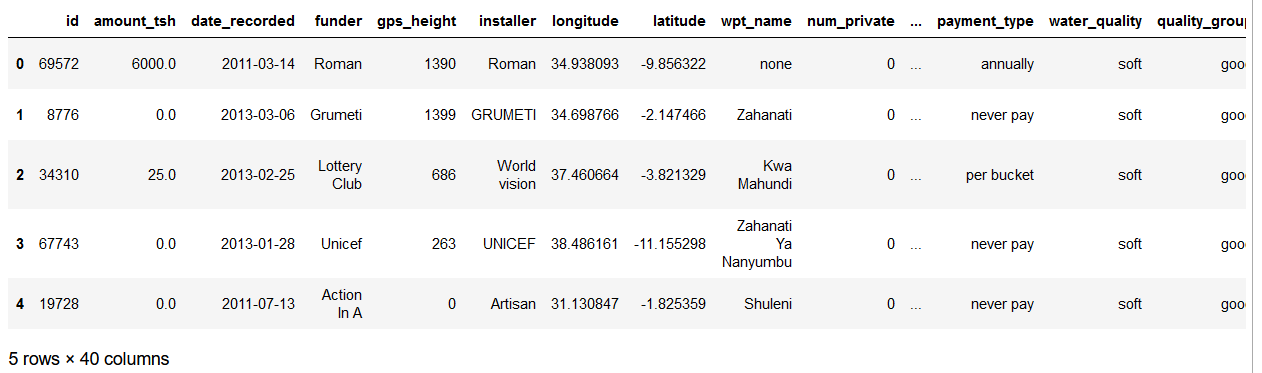

#### 3.2.1.1 Univaried Analysis

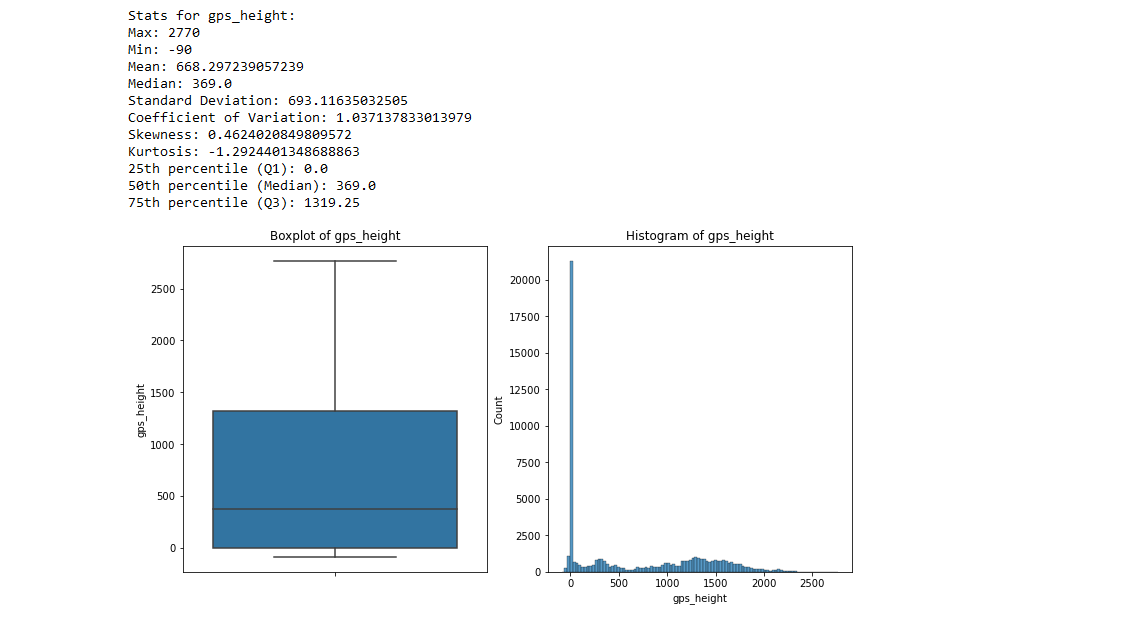

#### 3.2.1.2 Multivaried Analysis

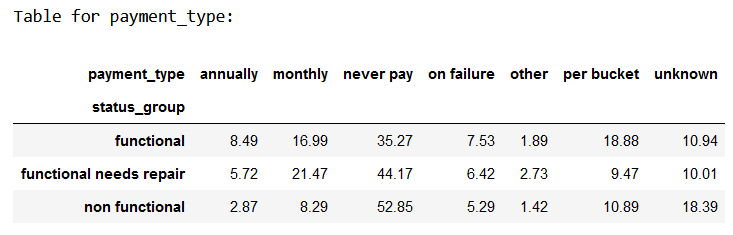

### 3.2.2 Data preprocessing

To have the detailed step by step results of the data preprocessing, please see the data preprocessing notebook through this link [Go to Notebook 01_data_preprocessing.ipynb](01_data_preprocessing.ipynb)

### 3.2.2.1 Imbalance check

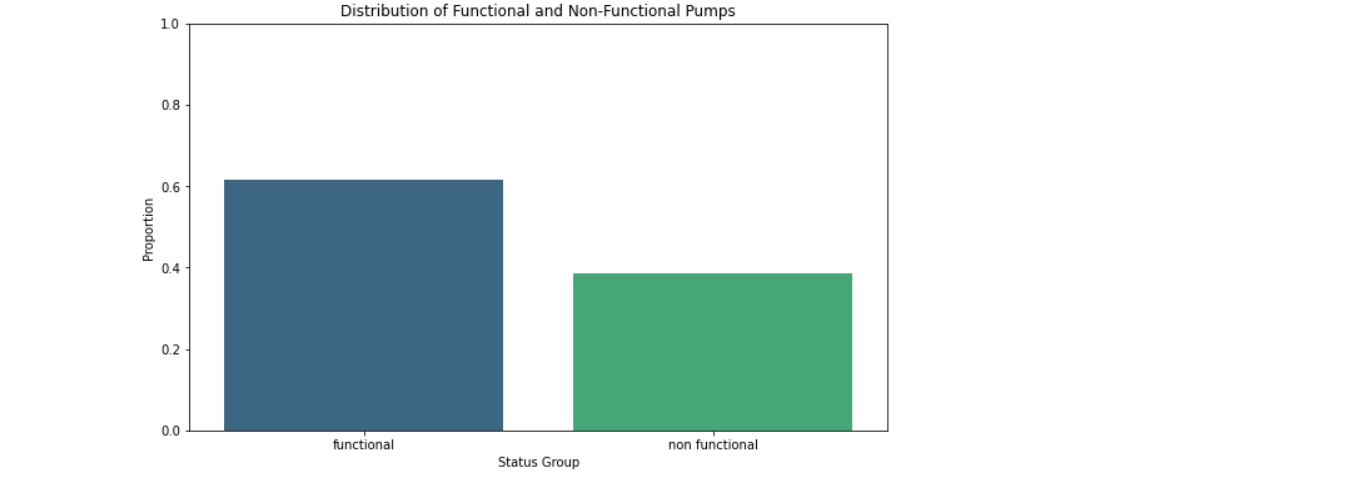

### 3.2.2.2 Categorical encoding

In [ ]:
# # Identifying categorical columns
# categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# # Printing the list of categorical columns
# print("Categorical columns in X_train:")
# print(categorical_columns)

Let's do a code to apply one hot enconder on the columns that have less than 6 variables and a target enconder on the columns that have more than 6 variables. The reason why we decide to not apply target encoding to all the columns directly is to avoid overfitting 

In [ ]:
# # Check if 'y_train' and 'y_test' need to be converted to a numeric type
# if y_train.dtype == 'object':
#     y_train = y_train.astype('category').cat.codes
# if y_test.dtype == 'object':
#     y_test = y_test.astype('category').cat.codes

# # Capture categorical columns from X_train for encoding
# categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# # Initialize encoders
# target_encoder = TargetEncoder()

# # Encoding the categorical columns in X_train and X_test
# for col in categorical_columns:
#     if X_train[col].nunique() <= 6:
#         # Apply OneHotEncoder for columns with 6 or fewer unique values
#         X_train = pd.get_dummies(X_train, columns=[col], drop_first=True)
#         X_test = pd.get_dummies(X_test, columns=[col], drop_first=True)
#     else:
#         # Apply TargetEncoder for columns with more than 6 unique values
#         X_train[col] = target_encoder.fit_transform(X_train[col], y_train)
#         X_test[col] = target_encoder.transform(X_test[col])
#         pickle.dump(target_encoder, open(f"model_objects/{col}_target_encoder.pickle", 'wb'))
                
# # Display the DataFrame to check the results
# X_train.head()

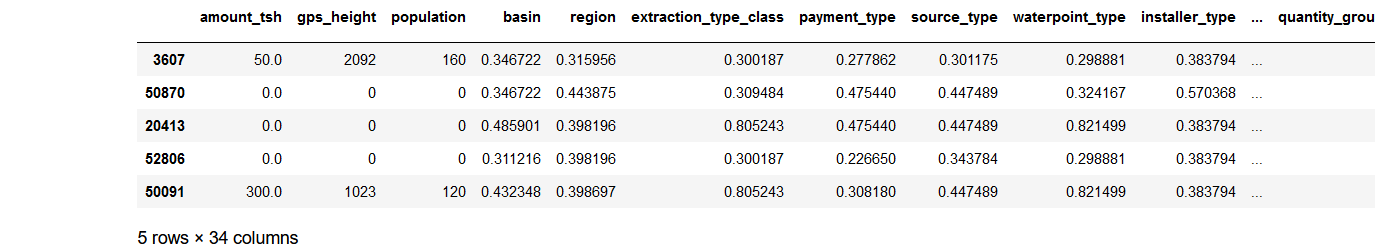

### 3.2.2.3 Numerical encoding

In [ ]:
# X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# # Display the DataFrame to check the results
# X_test.head()

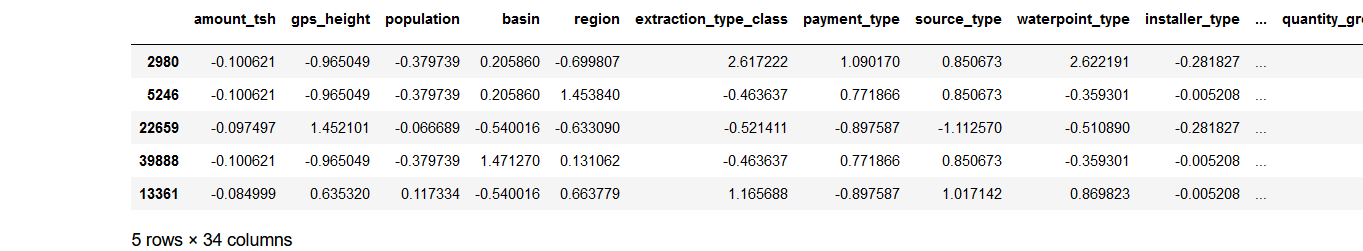

### 3.2.3 Model Creation

To have the detailed step by step results of the data preprocessing, please see the data preprocessing notebook through this link [Go to Notebook 02_model_creation.ipynb](02_model_creation.ipynb)

### 3.2.3.1 Hypertuning Decision Tree Classifier model

We created a baseline Decision Tree Classifier model and then by using the function GridSearchCV, we hypertuned the best combinations of parameters to improve the performance of the model. 

In [ ]:
# # Initialize the Decision Tree model
# decision_tree = DecisionTreeClassifier()

# # Define the parameter grid to search
# param_grid = {
#     'max_depth': range(5, 10),  # Explore depths from 1 to 20
#     'min_samples_split': range(5, 15, 2),  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': range(5, 10),  # Minimum number of samples required to be at a leaf node
#     'max_features': ['auto', 'log2', None]  # Number of features to consider when looking for the best split
# }

# # Define the scoring function using AUC
# scorer = make_scorer(roc_auc_score, needs_proba=True)

# # Setup the grid search with cross-validation
# grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=5)

# # Fit grid search on the training data
# grid_search.fit(X_train, y_train)

# # Find the best model
# best_tree = grid_search.best_estimator_

# # Save the best_tree
# pickle.dump(best_tree, open(f"model_objects/best_tree.pickle", 'wb'))

# # Output the best parameter combination and the corresponding score
# print("Best parameters found:", grid_search.best_params_)
# print("Best AUC achieved:", grid_search.best_score_)

# # Optional: Evaluate the best model on the test set
# y_pred_proba_best_tree = best_tree.predict_proba(X_test)[:, 1]
# test_auc = roc_auc_score(y_test, y_pred_proba_best_tree)
# print("Test AUC of best model:", test_auc)

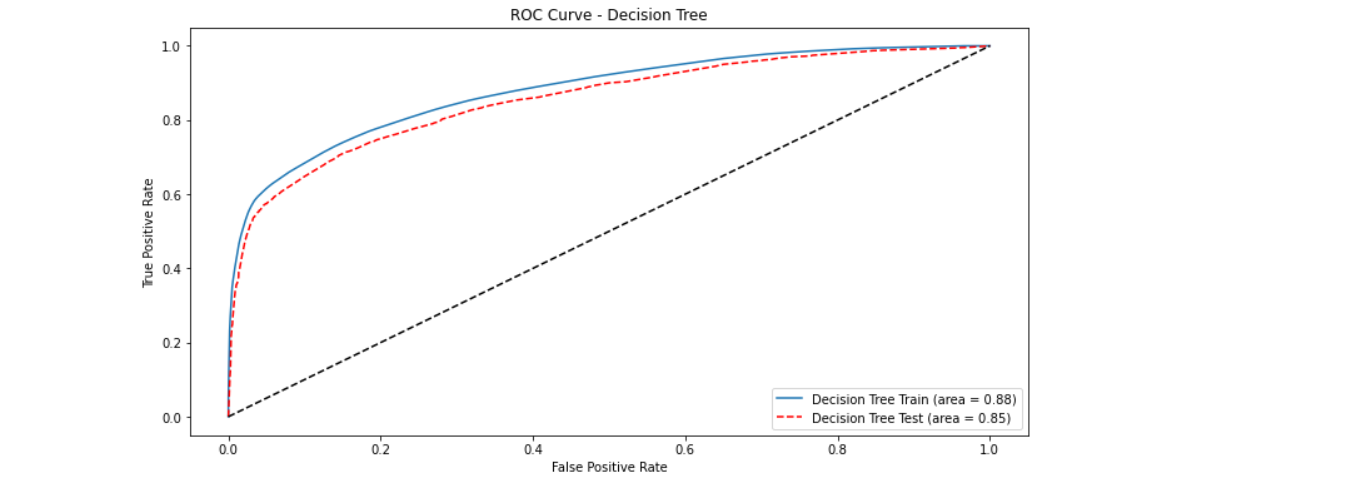

### 3.2.3.2 Hypertuning Logistic Regression model

In [ ]:
# # Initialize the Logistic Regression model
# logistic_regression = LogisticRegression()

# # Define the parameter grid to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
#     'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
# }

# # Define the scoring function using AUC
# scorer = make_scorer(roc_auc_score, needs_proba=True)

# # Setup the grid search with cross-validation
# grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring=scorer, cv=5)

# # Fit grid search on the training data
# grid_search.fit(X_train, y_train)

# # Find the best model
# best_log_reg = grid_search.best_estimator_

# # Output the best parameter combination and the corresponding score
# print("Best parameters found:", grid_search.best_params_)
# print("Best AUC achieved:", grid_search.best_score_)

# # Optional: Evaluate the best model on the test set
# y_pred_proba_best_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
# test_auc = roc_auc_score(y_test, y_pred_proba_best_log_reg)
# print("Test AUC of best model:", test_auc)

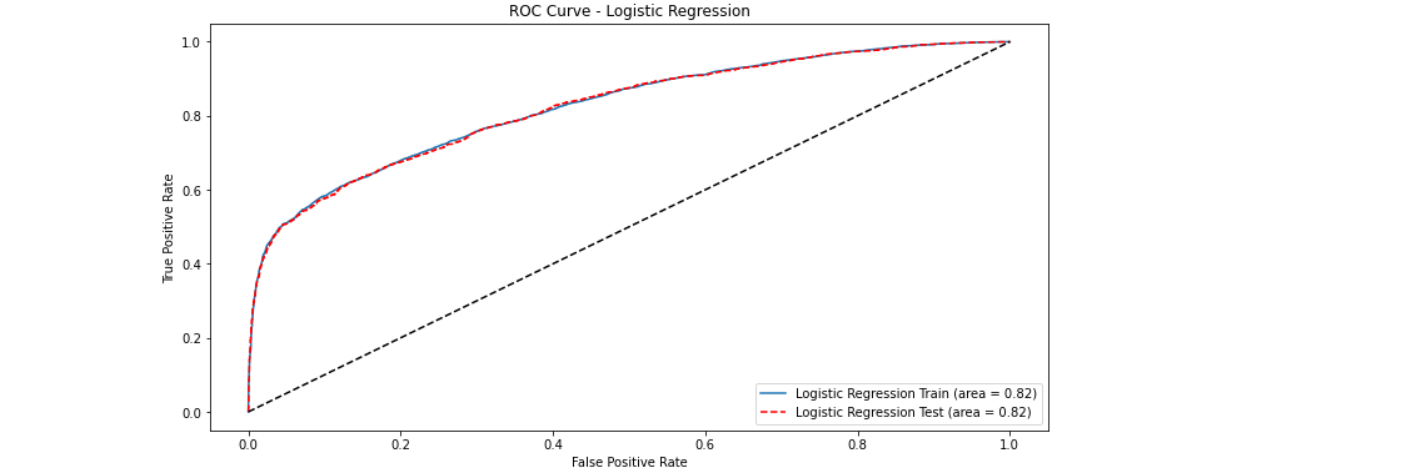

### 3.2.3.3 Conclusions